In [1]:
import scipy.io
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib notebook
warnings.filterwarnings('ignore')

mat = scipy.io.loadmat('sintesis.mat')
mat.pop('__header__')
mat.pop('__version__')
mat.pop('__globals__')

B = mat['ganancia'][0]
a_i = mat['coef']
x_n = mat['excit']

# Apartat A

<StemContainer object of 3 artists>

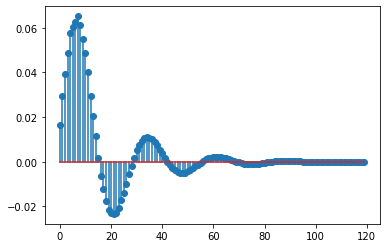

In [2]:
dK = np.array([1]+[0]*119)
h_n = scipy.signal.lfilter([B[99]], a_i[99], dK, axis= -1, zi=None)
plt.close('all')
plt.stem(range(120), h_n)

resposta impulsional (fig 2) la qual té mida 120.

# Apartat B

<StemContainer object of 3 artists>

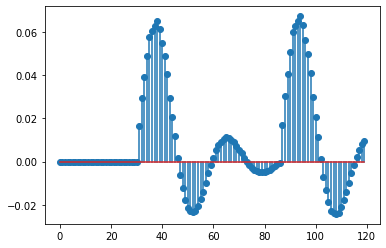

In [3]:
y_n = scipy.signal.lfilter([B[99]], a_i[99], x_n[99], axis= -1, zi=None)
plt.close('all')
plt.stem(range(120), y_n)

# Apartat C

<class 'numpy.ndarray'>


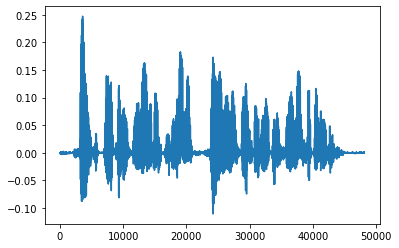

In [7]:
salida = np.array([])
print(type(salida))
for n in range(401):
    salida = np.append(salida, scipy.signal.lfilter([B[n]], a_i[n], x_n[n], axis= -1, zi=None))

plt.close('all')
plt.plot(range(120*401), salida)

In [8]:
import sounddevice as sd

sd.play(salida, 120*401)